<a href="https://colab.research.google.com/github/jakekrafczyk/Fin-Analysis/blob/master/btc_timeseries_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ETH_USDT-6h.json to ETH_USDT-6h.json


In [2]:
import pandas as pd
import numpy as np

df = pd.read_json("ETH_USDT-6h.json")
print(df)

                  0       1       2       3       4             5
0     1502928000000  301.13  303.28  298.00  303.10     503.34123
1     1502949600000  302.40  312.00  301.90  308.95    2236.32270
2     1502971200000  308.95  312.18  298.21  308.33    2670.81200
3     1502992800000  308.33  311.53  298.96  302.00    1620.23441
4     1503014400000  302.00  306.47  295.19  304.70    2660.25471
...             ...     ...     ...     ...     ...           ...
4636  1603195200000  367.98  373.22  366.85  370.01  201539.62016
4637  1603216800000  370.01  370.52  366.50  368.52  109469.67585
4638  1603238400000  368.53  381.90  367.74  379.90  227636.29516
4639  1603260000000  379.89  382.42  376.01  379.37  172407.47914
4640  1603281600000  379.37  399.46  377.43  394.79  518795.16248

[4641 rows x 6 columns]


In [3]:
from datetime import datetime
df['Year'] = 0
for i in df.index:
  #print(df.loc[[i],[0]][0])
  #datetime.fromtimestamp(x).strftime(' %I:%M %p %b. %d, %y')
  #print(int(df[0][i]) / 1000)
  stamp = int(df[0][i]) / 1000
  #stamp = int(df.loc[[i],[0]][0].item()) / 1000
  df.loc[i,'Year'] = datetime.fromtimestamp(stamp).strftime('%y')
  df.loc[i,'Day'] = datetime.fromtimestamp(stamp).strftime('%d')
  df.loc[i,'Month'] = datetime.fromtimestamp(stamp).strftime('%b')
  df.loc[i,'Hour'] = datetime.fromtimestamp(stamp).strftime('%I %p')
  df.loc[i,'Minute'] = datetime.fromtimestamp(stamp).strftime('%M')


print(df)

                  0       1       2       3  ...  Day  Month   Hour Minute
0     1502928000000  301.13  303.28  298.00  ...   17    Aug  12 AM     00
1     1502949600000  302.40  312.00  301.90  ...   17    Aug  06 AM     00
2     1502971200000  308.95  312.18  298.21  ...   17    Aug  12 PM     00
3     1502992800000  308.33  311.53  298.96  ...   17    Aug  06 PM     00
4     1503014400000  302.00  306.47  295.19  ...   18    Aug  12 AM     00
...             ...     ...     ...     ...  ...  ...    ...    ...    ...
4636  1603195200000  367.98  373.22  366.85  ...   20    Oct  12 PM     00
4637  1603216800000  370.01  370.52  366.50  ...   20    Oct  06 PM     00
4638  1603238400000  368.53  381.90  367.74  ...   21    Oct  12 AM     00
4639  1603260000000  379.89  382.42  376.01  ...   21    Oct  06 AM     00
4640  1603281600000  379.37  399.46  377.43  ...   21    Oct  12 PM     00

[4641 rows x 11 columns]


In [4]:
# OHLC
df['Open'] = df[1]
df['High'] = df[2]
df['Low'] = df[3]
df['Close'] = df[4]
df['Volume'] = df[5]

In [5]:
df = df.drop(columns=[0,1,2,3,4,5])
print(df)

     Year Day Month   Hour Minute    Open    High     Low   Close        Volume
0      17  17   Aug  12 AM     00  301.13  303.28  298.00  303.10     503.34123
1      17  17   Aug  06 AM     00  302.40  312.00  301.90  308.95    2236.32270
2      17  17   Aug  12 PM     00  308.95  312.18  298.21  308.33    2670.81200
3      17  17   Aug  06 PM     00  308.33  311.53  298.96  302.00    1620.23441
4      17  18   Aug  12 AM     00  302.00  306.47  295.19  304.70    2660.25471
...   ...  ..   ...    ...    ...     ...     ...     ...     ...           ...
4636   20  20   Oct  12 PM     00  367.98  373.22  366.85  370.01  201539.62016
4637   20  20   Oct  06 PM     00  370.01  370.52  366.50  368.52  109469.67585
4638   20  21   Oct  12 AM     00  368.53  381.90  367.74  379.90  227636.29516
4639   20  21   Oct  06 AM     00  379.89  382.42  376.01  379.37  172407.47914
4640   20  21   Oct  12 PM     00  379.37  399.46  377.43  394.79  518795.16248

[4641 rows x 10 columns]


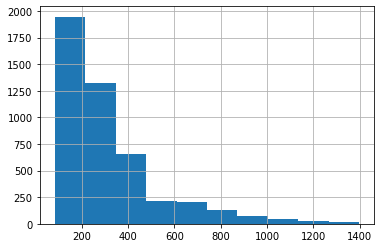

In [6]:
df.Open.hist()

In [7]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_results = kpss_test(df['Open'].values,regression='ct')
#print(kpss_results)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KPSS Statistic: 1.266242952939936
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [8]:
kpss_results = kpss_test(df['Open'].apply(np.log).values,regression='ct')

KPSS Statistic: 1.661016788151486
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [9]:
uploaded = files.upload()

Saving BTC_USDT-6h.json to BTC_USDT-6h.json


In [10]:
btc = pd.read_json("BTC_USDT-6h.json")
print(btc.head)

<bound method NDFrame.head of                   0         1         2         3         4             5
0     1502928000000   4261.48   4328.69   4261.32   4315.32     70.415925
1     1502949600000   4330.29   4485.39   4287.41   4427.30     75.292822
2     1502971200000   4436.06   4485.39   4235.45   4289.24    301.685704
3     1502992800000   4289.24   4369.69   4200.74   4285.08    347.755926
4     1503014400000   4285.08   4340.62   4134.61   4313.56    391.159844
...             ...       ...       ...       ...       ...           ...
4636  1603195200000  11778.85  12038.38  11765.00  11962.82  25031.224764
4637  1603216800000  11962.81  11981.20  11855.00  11909.99  12144.595729
4638  1603238400000  11910.00  12295.00  11886.95  12229.08  22900.168787
4639  1603260000000  12229.07  12379.00  12122.63  12335.00  17892.989401
4640  1603281600000  12334.36  12899.99  12275.58  12760.17  40632.550923

[4641 rows x 6 columns]>


In [11]:
print(btc[1].apply(np.log))

0       8.357372
1       8.373390
2       8.397522
3       8.363865
4       8.362895
          ...   
4636    9.374061
4637    9.389558
4638    9.385134
4639    9.411571
4640    9.420144
Name: 1, Length: 4641, dtype: float64


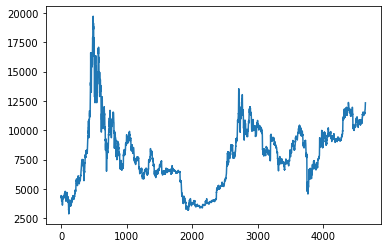

In [12]:
btc[1].plot()

In [13]:
kpss_test(btc[1].values,regression='ct')

KPSS Statistic: 0.9497196748712147
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


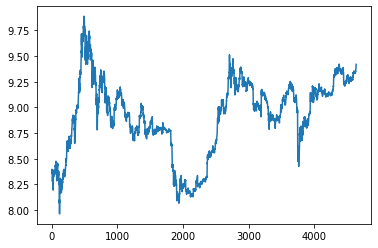

In [14]:
btc[1].apply(np.log).plot()

In [15]:
kpss_test(btc[1].apply(np.log).values,regression='ct')

KPSS Statistic: 1.0203811185840048
p-value: 0.01
num lags: 32
Critial Values:
   10% : 0.119
   5% : 0.146
   2.5% : 0.176
   1% : 0.216
Result: The series is not stationary


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
